In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63c353b3e4da08f3cd53a5d782d0014a


In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [30]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | laguna
Processing Record 2 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 1 | chaoyang
Processing Record 4 of Set 1 | san cristobal
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | richards bay
Processing Record 7 of Set 1 | nyaunglebin
Processing Record 8 of Set 1 | suntar
Processing Record 9 of Set 1 | farmington
Processing Record 10 of Set 1 | nguiu
City not found. Skipping...
Processing Record 11 of Set 1 | oranjemund
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | priyutovo
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | escarcega
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 

Processing Record 34 of Set 4 | ponta do sol
Processing Record 35 of Set 4 | hasaki
Processing Record 36 of Set 4 | gaptsakh
Processing Record 37 of Set 4 | airai
Processing Record 38 of Set 4 | grindavik
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | dunedin
Processing Record 41 of Set 4 | souillac
Processing Record 42 of Set 4 | sao joao da barra
Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | gariaband
Processing Record 46 of Set 4 | stokmarknes
Processing Record 47 of Set 4 | karratha
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | henties bay
Processing Record 50 of Set 4 | champerico
Processing Record 1 of Set 5 | honningsvag
Processing Record 2 of Set 5 | nkan
Processing Record 3 of Set 5 | klyuchi
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | rawson
Processing Record 6 of Set 5 | san patricio
Processing Record 7 of Set 5 | luleburga

Processing Record 25 of Set 8 | nishihara
Processing Record 26 of Set 8 | kuching
Processing Record 27 of Set 8 | nizhniy chir
Processing Record 28 of Set 8 | geraldton
Processing Record 29 of Set 8 | harper
Processing Record 30 of Set 8 | te anau
Processing Record 31 of Set 8 | doha
Processing Record 32 of Set 8 | mbigou
Processing Record 33 of Set 8 | lompoc
Processing Record 34 of Set 8 | cayenne
Processing Record 35 of Set 8 | xiongzhou
Processing Record 36 of Set 8 | thrissur
Processing Record 37 of Set 8 | veraval
Processing Record 38 of Set 8 | marcona
City not found. Skipping...
Processing Record 39 of Set 8 | saleaula
City not found. Skipping...
Processing Record 40 of Set 8 | hay river
Processing Record 41 of Set 8 | codrington
Processing Record 42 of Set 8 | belmonte
Processing Record 43 of Set 8 | basco
Processing Record 44 of Set 8 | nouadhibou
Processing Record 45 of Set 8 | kismayo
Processing Record 46 of Set 8 | bolivar
Processing Record 47 of Set 8 | sattahip
Processin

Processing Record 11 of Set 12 | simao
Processing Record 12 of Set 12 | bouna
Processing Record 13 of Set 12 | nuevo ideal
Processing Record 14 of Set 12 | guerrero negro
Processing Record 15 of Set 12 | acarau
Processing Record 16 of Set 12 | sabzevar
Processing Record 17 of Set 12 | gisborne
Processing Record 18 of Set 12 | togur
Processing Record 19 of Set 12 | abu jubayhah
City not found. Skipping...
Processing Record 20 of Set 12 | barra
Processing Record 21 of Set 12 | barra do garcas
Processing Record 22 of Set 12 | vestmannaeyjar
Processing Record 23 of Set 12 | sao jose da coroa grande
Processing Record 24 of Set 12 | vigrestad
Processing Record 25 of Set 12 | tocopilla
Processing Record 26 of Set 12 | fort dodge
Processing Record 27 of Set 12 | port lincoln
Processing Record 28 of Set 12 | sorong
Processing Record 29 of Set 12 | zeya
Processing Record 30 of Set 12 | brazzaville
Processing Record 31 of Set 12 | kabo
Processing Record 32 of Set 12 | teluknaga
Processing Record 

In [31]:
len(cities)

626

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2022-07-17 22:24:10,38.4210,-121.4238,108.32,21,0,8.05
1,Chaoyang,CN,2022-07-17 22:24:11,41.5703,120.4586,67.86,85,0,4.52
2,San Cristobal,VE,2022-07-17 22:24:11,7.7669,-72.2250,78.98,68,48,4.85
3,Bredasdorp,ZA,2022-07-17 22:24:11,-34.5322,20.0403,53.22,87,0,4.25
4,Richards Bay,ZA,2022-07-17 22:24:12,-28.7830,32.0377,65.19,87,0,9.82
5,Nyaunglebin,MM,2022-07-17 22:24:13,17.9500,96.7333,76.30,95,86,2.37
6,Suntar,RU,2022-07-17 22:24:13,62.1444,117.6319,56.61,94,100,2.98
7,Farmington,US,2022-07-17 22:21:18,36.7281,-108.2187,101.77,13,0,10.36
8,Oranjemund,NA,2022-07-17 22:24:14,-28.5500,16.4333,57.60,82,0,5.75
9,Busselton,AU,2022-07-17 22:24:15,-33.6500,115.3333,54.19,91,99,14.41


In [28]:
# Reorder the columns in the order you want them to appear.
#new_column_order = {"City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"}
#city_data_df = city_data_df[new_column_order]
#city_data_df.head(10)

,Humidity,Country,City,Cloudiness,Date,Max Temp,Wind Speed,Lat,Lng
0,27,US,Laguna,0,2022-07-17 20:57:34,106.32,5.99,38.4210,-121.4238
1,91,CN,Chaoyang,0,2022-07-17 20:57:34,65.03,4.85,41.5703,120.4586
2,60,VE,San Cristobal,47,2022-07-17 20:55:24,80.78,5.82,7.7669,-72.2250
3,87,ZA,Bredasdorp,0,2022-07-17 20:57:35,53.76,4.81,-34.5322,20.0403
4,86,ZA,Richards Bay,0,2022-07-17 20:57:35,65.62,10.49,-28.7830,32.0377
5,94,MM,Nyaunglebin,85,2022-07-17 20:57:36,76.78,2.10,17.9500,96.7333
6,94,RU,Suntar,100,2022-07-17 20:57:36,56.16,3.02,62.1444,117.6319
7,16,US,Farmington,0,2022-07-17 20:52:51,100.78,8.05,36.7281,-108.2187
8,80,NA,Oranjemund,0,2022-07-17 20:57:37,58.08,6.58,-28.5500,16.4333
9,91,AU,Busselton,99,2022-07-17 20:57:38,53.83,14.20,-33.6500,115.3333


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

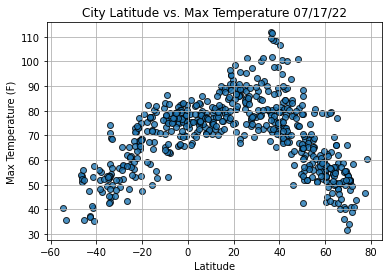

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

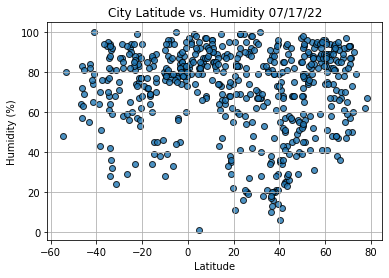

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

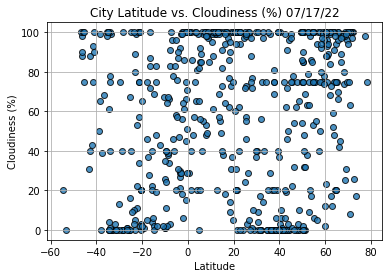

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

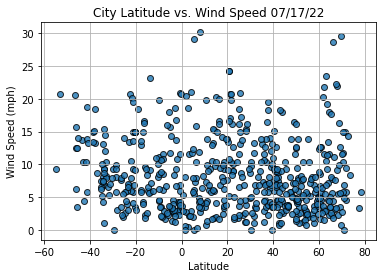

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()